In [1]:
import numpy as np
from scipy import stats
import pandas as pd
import sklearn as sk
import seaborn as sb
import datetime as dt
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.linear_model import LogisticRegression
from sklearn.cross_validation import train_test_split
from sklearn import metrics 
from sklearn.metrics import classification_report

from sklearn.cross_validation import cross_val_score
%matplotlib inline



C:\Users\conor\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [2]:
ipo_data = pd.read_excel("Competation #1 Raw Data_New.xlsx",header=0,na_values='-' )

In [3]:
print(ipo_data.dtypes)

I1          object
I2          object
I3          object
P(IPO)     float64
P(H)       float64
P(L)       float64
P(1Day)    float64
C1         float64
C2         float64
C3         float64
C4         float64
C5         float64
C6         float64
C7         float64
T1         float64
T2         float64
T3         float64
T4         float64
T5         float64
S1         float64
S2         float64
S3         float64
dtype: object


In [4]:
print(ipo_data.head(20))

      I1                                     I2    I3  P(IPO)  P(H)  P(L)  \
0   AATI     ADVANCED ANALOGIC TECHNOLOGIES INC  3674    10.0   9.5   8.5   
1   ABPI        ACCENTIA BIOPHARMACEUTICALS INC  2834     8.0  10.0   8.0   
2   ACAD             ACADIA PHARMACEUTICALS INC  2834     7.0  14.0  12.0   
3   ACHN          ACHILLION PHARMACEUTICALS INC  2834    11.5  16.0  14.0   
4   ACLI        AMERICAN COMMERCIAL LINES INC.   4492    21.0  21.0  19.0   
5   ACOM                     Ancestry.com Inc.   7379    13.5  14.5  12.5   
6   ACOR                ACORDA THERAPEUTICS INC  2836     6.0  13.0  11.0   
7   ACRX             ACELRX PHARMACEUTICALS INC  2834     5.0  14.0  12.0   
8   ACTV                     ACTIVE NETWORK INC  7372    15.0  18.0  16.0   
9    ACW                          ACCURIDE CORP  3714     9.0  19.0  17.0   
10  ADKU             ADCARE HEALTH SYSTEMS, INC   NaN     NaN   NaN   NaN   
11  ADLS  Advanced Life Sciences Holdings, Inc.  2854     5.0   9.0   8.0   

In [5]:
# Some values dont make sesne (like negatives) and P(H) having a zero min - maybe look into when p(h) < p(L)
#converting 1 and 0 to true and false
ipo_data.C2 = ipo_data.C2.astype(bool)
ipo_data.describe()

,P(IPO),P(H),P(L),P(1Day),C1,C3,C4,C5,C6,C7,T1,T2,T3,T4,T5,S1,S2,S3
count,677.000000,672.000000,672.000000,660.000000,660.000000,646.000000,660.000000,6.760000e+02,6.760000e+02,610.000000,681.000000,681.000000,681.000000,681.000000,681.000000,681.000000,681.000000,681.000000
mean,13.837666,15.481190,13.515045,25.934766,149.728788,1.788904,0.007282,4.935776e+07,1.241519e+07,500.459962,465.634361,12758.606461,11395.844347,294.353891,679.220264,68.421439,120.104258,144.759178
std,6.053731,6.653429,5.835646,73.234948,152.817467,162.666532,0.033318,1.043764e+08,2.512855e+07,1648.337634,175.741647,5449.644597,4839.670179,121.532637,472.914323,39.096525,84.828959,69.276285
min,3.000000,0.000000,3.000000,0.000000,10.000000,-786.239000,-0.162352,3.693227e+06,5.250000e+05,0.074000,132.000000,0.000000,0.000000,0.000000,-1.000000,-1.000000,20.000000,26.000000
25%,10.000000,12.500000,11.000000,11.000000,85.000000,-0.852500,-0.013927,1.871417e+07,5.000000e+06,37.245750,351.000000,9195.000000,8162.000000,213.000000,462.000000,45.000000,73.000000,100.000000
50%,13.500000,15.000000,13.000000,14.845000,107.000000,0.010000,0.009125,2.740018e+07,7.398704e+06,103.833000,444.000000,12045.000000,10785.000000,279.000000,624.000000,60.000000,100.000000,134.000000
75%,17.000000,17.000000,15.000000,20.485000,155.250000,0.470000,0.031571,4.980786e+07,1.200000e+07,331.138000,551.000000,15241.000000,13760.000000,354.000000,795.000000,85.000000,142.000000,173.000000
max,85.000000,135.000000,108.000000,1159.200562,2087.000000,3864.500000,0.092896,2.138085e+09,4.212336e+08,30683.000000,1750.000000,49056.000000,43952.000000,1058.000000,10277.000000,309.000000,944.000000,883.000000


In [6]:
print(np.count_nonzero(ipo_data['P(IPO)'].isnull().values))   
print(np.count_nonzero(ipo_data.isnull())) 

5
227


In [7]:
ipo_data.loc[ipo_data['P(H)'] <= ipo_data['P(L)']]

,I1,I2,I3,P(IPO),P(H),P(L),P(1Day),C1,C2,C3,...,C6,C7,T1,T2,T3,T4,T5,S1,S2,S3
332,KIPS,"Kips Bay Medical, Inc.",3841,8.0,0.00,8.00,7.93000,309.0,False,-0.70,...,2062500.0,0.223,341.0,9314.0,8647.0,218.0,519.0,55.0,119.0,102.0
416,NPTT,NPTEST HOLDING CORP,3825,12.0,3.00,11.00,11.49000,92.0,True,NaN,...,14600000.0,243.491,411.0,11737.0,10440.0,275.0,784.0,66.0,133.0,289.0
469,PRGN,Paragon Shipping Inc.,4412,16.0,9.11,9.11,144.99997,67.0,True,0.14,...,10300000.0,4.729,369.0,10227.0,9092.0,231.0,362.0,40.0,67.0,83.0


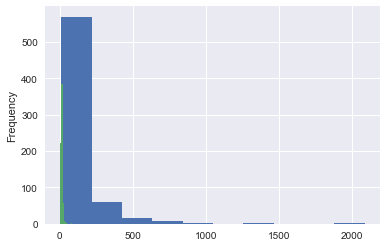

In [8]:
ipo_data.C1.hist()
ipo_data['P(IPO)'].plot(kind='hist')


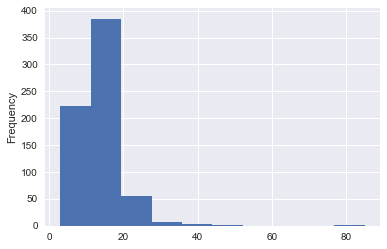

In [9]:
ipo_data['P(IPO)'].plot(kind='hist')

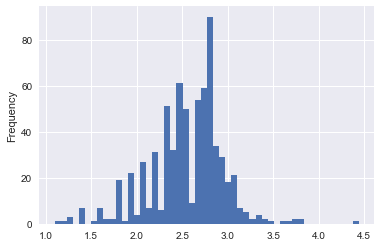

In [10]:
np.log(ipo_data['P(IPO)']).plot(kind='hist',bins=50)

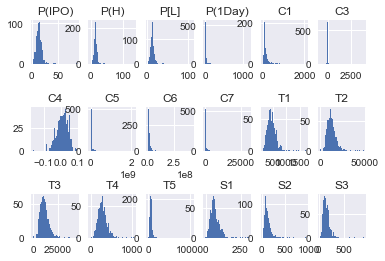

In [11]:
# Creating a grid of charts to see obvious non normal variables
# Setting up subplot
f, axarr = plt.subplots(3, 6)

# Creating first row of histograms
axarr[0, 0].hist(ipo_data['P(IPO)'].dropna(),50)
axarr[0, 0].set_title('P(IPO)')
axarr[0, 1].hist(ipo_data['P(H)'].dropna(),50)
axarr[0, 1].set_title('P(H)')
axarr[0, 2].hist(ipo_data['P(L)'].dropna(),50)
axarr[0, 2].set_title('P[L]')
axarr[0, 3].hist(ipo_data['P(1Day)'].dropna(),50)
axarr[0, 3].set_title('P(1Day)')
axarr[0, 4].hist(ipo_data['C1'].dropna(),50)
axarr[0, 4].set_title('C1')
axarr[0, 5].hist(ipo_data['C3'].dropna(),50)
axarr[0, 5].set_title('C3')

# Creating second row of histograms
axarr[1, 0].hist(ipo_data['C4'].dropna(),50)
axarr[1, 0].set_title('C4')
axarr[1, 1].hist(ipo_data['C5'].dropna(),50)
axarr[1, 1].set_title('C5')
axarr[1, 2].hist(ipo_data['C6'].dropna(),50)
axarr[1, 2].set_title('C6')
axarr[1, 3].hist(ipo_data['C7'].dropna(),50)
axarr[1, 3].set_title('C7')
axarr[1, 4].hist(ipo_data['T1'].dropna(),50)
axarr[1, 4].set_title('T1')
axarr[1, 5].hist(ipo_data['T2'].dropna(),50)
axarr[1, 5].set_title('T2')

# Creating third row of histograms
axarr[2, 0].hist(ipo_data['T3'].dropna(),50)
axarr[2, 0].set_title('T3')
axarr[2, 1].hist(ipo_data['T4'].dropna(),50)
axarr[2, 1].set_title('T4')
axarr[2, 2].hist(ipo_data['T5'].dropna(),50)
axarr[2, 2].set_title('T5')
axarr[2, 3].hist(ipo_data['S1'].dropna(),50)
axarr[2, 3].set_title('S1')
axarr[2, 4].hist(ipo_data['S2'].dropna(),50)
axarr[2, 4].set_title('S2')
axarr[2, 5].hist(ipo_data['S3'].dropna(),50)
axarr[2, 5].set_title('S3')
# Fine-tune figure; make subplots farther from each other.
f.subplots_adjust(hspace=1)

plt.show()

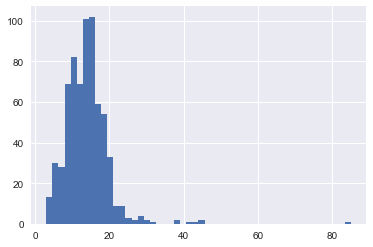

In [12]:
plt.hist(ipo_data['P(IPO)'].dropna(),50)
plt.show()

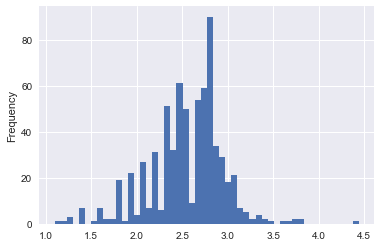

In [13]:
np.log(ipo_data['P(IPO)']).plot(kind='hist',bins=50)

#### P(IPO) Histogram
Generating histogram of whole data set and minus outliers to check for normality

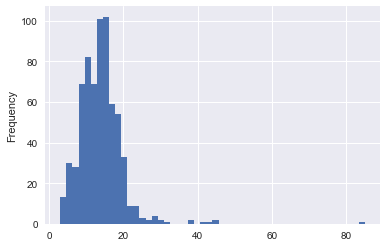

In [14]:
# Graph of P(IPO)
ipo_data['P(IPO)'].plot(kind='hist',bins=50)

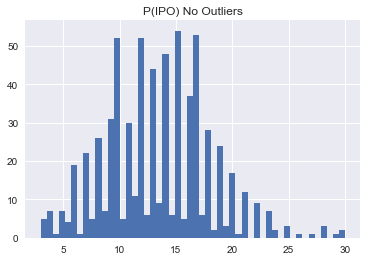

In [15]:
ipo_no_outlier=ipo_data['P(IPO)']<=np.mean(ipo_data['P(IPO)'])+3*np.std(ipo_data['P(IPO)'])
ipo_no_outlier_d=ipo_data['P(IPO)'][ipo_no_outlier]
plt.hist(ipo_no_outlier_d,bins=50)
plt.title('P(IPO) No Outliers')
plt.show()

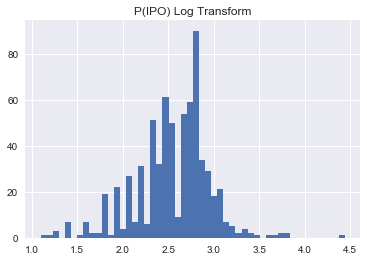

In [16]:
# Log transform of whole data and no outlier data
log_ipo_data=np.log(ipo_data['P(IPO)'])
log_ipo_no_outlier=np.log(ipo_no_outlier_d)

#f, axarr = plt.subplots(2, 1)
# axarr[1, 0].hist(log_ipo_data.dropna(),50)
# axarr[1, 0].set_title('Outlier P(IPO)')

# axarr[0, 1].hist(log_ipo_no_outlier.dropna(),50)
# axarr[0, 1].set_title('No Outlier P(IPO)')

plt.hist(log_ipo_data.dropna(),50)

plt.title('P(IPO) Log Transform')
plt.show()

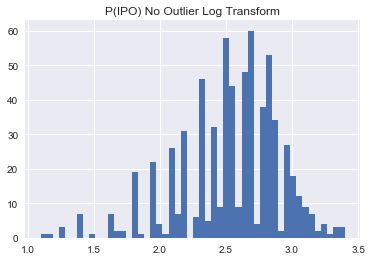

In [17]:
plt.hist(log_ipo_no_outlier.dropna(),50)
plt.title('P(IPO) No Outlier Log Transform')
plt.show()

#### P(H) Histogram
Generating histogram of whole data set and minus outliers to check for normality

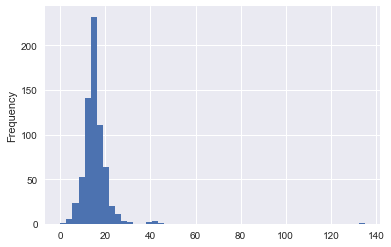

In [18]:
# Graph of P(IPO)
ipo_data['P(H)'].plot(kind='hist',bins=50)

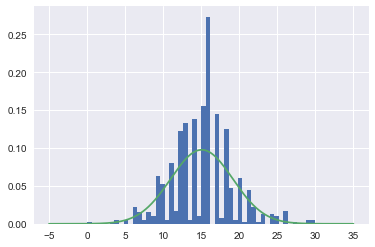

In [25]:
# Removing outliers and plotting
h_no_outlier=ipo_data['P(H)']<=np.mean(ipo_data['P(H)'])+3*np.std(ipo_data['P(H)'])
h_no_outlier_d=ipo_data['P(H)'][h_no_outlier]
plt.hist(h_no_outlier_d,bins=50,normed=True)
xt = plt.xticks()[0]  
xmin, xmax = min(xt), max(xt)  
lnspc = np.linspace(xmin, xmax, len(h_no_outlier_d))

# lets try the normal distribution first
m, s = stats.norm.fit(h_no_outlier_d) # get mean and standard deviation  
pdf_g = stats.norm.pdf(lnspc, m, s) # now get theoretical values in our interval  
plt.plot(lnspc, pdf_g, label="Norm")
plt.show()

In [20]:
# Log transform of whole data and no outlier data
# Only taking greater than 0 and checking new data

greater=ipo_data['P(H)']>0
greater_no_out=h_no_outlier_d>0

ipo_data['P(H)'][greater].describe()



count    671.000000
mean      15.504262
std        6.631436
min        3.000000
25%       12.750000
50%       15.000000
75%       17.000000
max      135.000000
Name: P(H), dtype: float64

In [21]:
h_no_outlier_d[greater_no_out].describe()

count    664.000000
mean      15.086386
std        4.050687
min        3.000000
25%       12.375000
50%       15.000000
75%       17.000000
max       30.000000
Name: P(H), dtype: float64

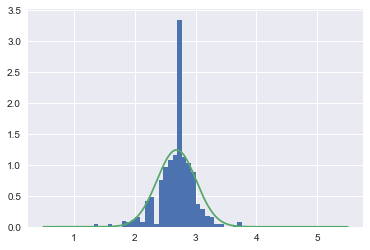

In [22]:

log_h_data=np.log(ipo_data['P(H)'][greater])
log_h_no_outlier=np.log(h_no_outlier_d[greater_no_out])

plt.hist(log_h_data.dropna(),50,normed=True)

xt = plt.xticks()[0]  
xmin, xmax = min(xt), max(xt)  
lnspc = np.linspace(xmin, xmax, len(log_h_data))

# lets try the normal distribution first
m, s = stats.norm.fit(log_h_data) # get mean and standard deviation  
pdf_g = stats.norm.pdf(lnspc, m, s) # now get theoretical values in our interval  
plt.plot(lnspc, pdf_g, label="Norm")
plt.show()

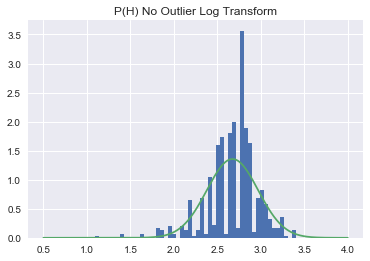

In [23]:

plt.hist(log_h_no_outlier.dropna(),50,normed=True)
plt.title('P(H) No Outlier Log Transform')
xt = plt.xticks()[0]  
xmin, xmax = min(xt), max(xt)  
lnspc = np.linspace(xmin, xmax, len(log_h_no_outlier))

# lets try the normal distribution first
m, s = stats.norm.fit(log_h_no_outlier) # get mean and standard deviation  
pdf_g = stats.norm.pdf(lnspc, m, s) # now get theoretical values in our interval  
plt.plot(lnspc, pdf_g, label="Norm")

plt.show()